## Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import keras
from keras.models import Sequential
from keras.layers import Conv2D,Dense,MaxPool2D,Flatten,Dropout
from keras.preprocessing.image import ImageDataGenerator,img_to_array,load_img

 ### Loading Data

In [3]:
train_datagen = ImageDataGenerator(rescale=1/255)
test_datagen = ImageDataGenerator(rescale=1/255)
train_path = '../input/cat-and-dogs/dataset/training_set'
train_set = train_datagen.flow_from_directory(directory=train_path,target_size=(128,128),batch_size=32,color_mode="rgb",class_mode = 'binary')
test_path = '../input/cat-and-dogs/dataset/test_set'
test_set = train_datagen.flow_from_directory(directory=train_path,target_size=(128,128),batch_size=30,color_mode="rgb",class_mode = 'binary')

Found 8000 images belonging to 2 classes.
Found 8000 images belonging to 2 classes.


### Visualizing

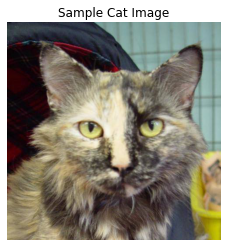

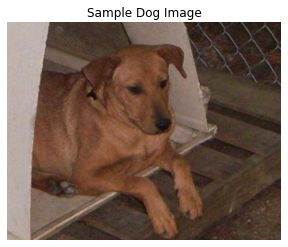

In [4]:
img=load_img(train_path + "/cats/cat.10.jpg")
plt.imshow(img)
plt.axis("off")
plt.title("Sample Cat Image")
plt.show()

plt.figure()

img=load_img(train_path + "/dogs/dog.100.jpg")
plt.imshow(img)
plt.axis("off")
plt.title("Sample Dog Image")
plt.show()

## Convolutional Neural Network

In [5]:
model = Sequential()
model.add(Conv2D(filters = 64, kernel_size = (5,5), activation = "relu", input_shape = (128,128,3)))
model.add(MaxPool2D(pool_size = (2,2)))
model.add(Conv2D(filters = 32, kernel_size = (5,5), activation = "relu"))
model.add(MaxPool2D(pool_size = (2,2)))
model.add(Dropout(0.25))
model.add(Conv2D(filters = 16, kernel_size = (5,5), activation = "relu"))
model.add(MaxPool2D(pool_size = (2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(units = 256, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(units = 1, activation = "sigmoid"))

2022-11-04 10:39:52.394427: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


### Defining the Compiler

In [6]:
model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['accuracy'])

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 124, 124, 64)      4864      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 62, 62, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 58, 58, 32)        51232     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 29, 29, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 29, 29, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 25, 25, 16)        12816     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 12, 12, 16)        0

## Fitting the Model

In [8]:
hist = model.fit(train_set, validation_data = test_set, epochs = 20)

2022-11-04 10:39:53.072165: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/20
250/250 [==============================] - 210s 835ms/step - loss: 0.7334 - accuracy: 0.5136 - val_loss: 0.6893 - val_accuracy: 0.5082
Epoch 2/20
250/250 [==============================] - 201s 803ms/step - loss: 0.6744 - accuracy: 0.5826 - val_loss: 0.6605 - val_accuracy: 0.5779
Epoch 3/20
250/250 [==============================] - 200s 799ms/step - loss: 0.6466 - accuracy: 0.6319 - val_loss: 0.6135 - val_accuracy: 0.6760
Epoch 4/20
250/250 [==============================] - 200s 802ms/step - loss: 0.6135 - accuracy: 0.6672 - val_loss: 0.5714 - val_accuracy: 0.7131
Epoch 5/20
250/250 [==============================] - 200s 801ms/step - loss: 0.5825 - accuracy: 0.7099 - val_loss: 0.6066 - val_accuracy: 0.6743
Epoch 6/20
250/250 [==============================] - 201s 803ms/step - loss: 0.5585 - accuracy: 0.7210 - val_loss: 0.4995 - val_accuracy: 0.7563
Epoch 7/20
250/250 [==============================] - 201s 804ms/step - loss: 0.5298 - accuracy: 0.7459 - val_loss: 0.4624 -

## Evaluate the Model

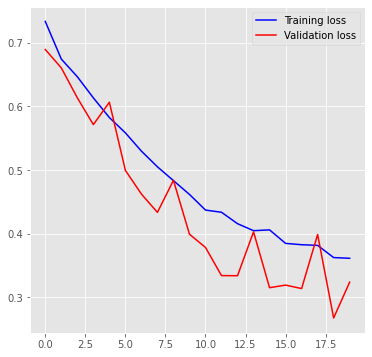

<Figure size 432x288 with 0 Axes>

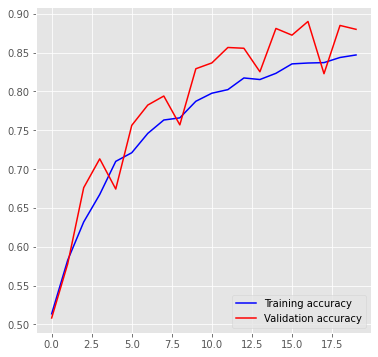

In [9]:
plt.figure(figsize=(6,6))
plt.style.use("ggplot")
plt.plot(hist.history['loss'], color='b', label="Training loss")
plt.plot(hist.history['val_loss'], color='r', label="Validation loss")
plt.legend()
plt.show()

plt.figure()

plt.figure(figsize=(6,6))
plt.style.use("ggplot")
plt.plot(hist.history['accuracy'], color='b', label="Training accuracy")
plt.plot(hist.history['val_accuracy'], color='r',label="Validation accuracy")
plt.legend(loc = "lower right")
plt.show()